In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/valorant-vct-2023-player-performance/overall_player_stats.csv
/kaggle/input/valorant-vct-2023-player-performance/player_stats_by_agent.csv


In [26]:
df = pd.read_csv('/kaggle/input/valorant-vct-2023-player-performance/overall_player_stats.csv')
df

,Player ID,Player,Team,Number of Agents Played,Rounds Played,Rating,ACS,KD,KAST,ADR,...,FDPR,HSP,CSP,CL,Kills Max,K,D,A,FK,FD
0,1,Demon1,EG,4,459,1.23,246.0,1.39,73%,166.4,...,0.09,40%,15%,Oct-67,28,421,302,80,69,41
1,2,keznit,KRÜ,2,90,1.19,266.0,1.13,68%,175.8,...,0.09,20%,18%,02-Nov,29,79,70,21,19,8
2,3,Leo,FNC,3,270,1.17,206.1,1.37,82%,138.3,...,0.03,27%,17%,Jul-42,25,201,147,119,13,8
3,4,Alfajer,FNC,3,270,1.17,232.4,1.39,73%,158.4,...,0.09,28%,11%,Apr-38,26,233,168,36,34,23
4,5,Less,LOUD,2,515,1.16,227.7,1.21,73%,149.5,...,0.07,24%,18%,Nov-61,28,416,344,100,51,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,76,BerLIN,FPX,3,85,0.71,155.8,0.60,65%,106.1,...,0.13,37%,NaN,0/7,13,40,67,29,10,11
76,77,SugarZ3ro,ZETA,2,79,0.67,120.7,0.66,63%,72.8,...,0.12,20%,NaN,0/4,17,38,58,24,1,6
77,78,Laz,ZETA,2,79,0.66,143.7,0.80,51%,84.8,...,0.22,26%,7%,Jan-14,20,48,60,11,3,11
78,79,TENNN,ZETA,1,79,0.62,160.7,0.67,51%,111.8,...,0.25,18%,NaN,0/7,16,44,66,9,4,13


In [27]:
df.describe()

,Player ID,Number of Agents Played,Rounds Played,Rating,ACS,KD,ADR,KPR,APR,FKPR,FDPR,Kills Max,K,D,A,FK,FD
count,80.0000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.00000,80.000000,80.00000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,40.5000,2.812500,229.125000,0.965875,193.355000,0.963625,127.452500,0.67725,0.288875,0.09650,0.103750,22.437500,159.475000,159.562500,70.562500,22.562500,22.562500
std,23.2379,0.994844,132.928017,0.143021,31.854244,0.185467,21.121817,0.11676,0.119810,0.05129,0.046453,4.980579,102.500383,89.212709,57.293348,19.360565,16.087454
min,1.0000,1.000000,79.000000,0.510000,108.300000,0.480000,72.800000,0.37000,0.070000,0.01000,0.030000,13.000000,29.000000,52.000000,6.000000,1.000000,2.000000
25%,20.7500,2.000000,119.750000,0.890000,172.775000,0.865000,112.775000,0.60000,0.190000,0.05750,0.070000,19.000000,74.500000,79.250000,28.250000,9.000000,10.750000
50%,40.5000,3.000000,210.000000,0.985000,193.200000,0.970000,129.400000,0.68000,0.280000,0.09500,0.100000,22.000000,138.500000,149.500000,56.500000,16.000000,16.000000
75%,60.2500,3.250000,301.750000,1.070000,216.550000,1.092500,142.075000,0.76000,0.360000,0.12000,0.130000,26.000000,215.750000,217.000000,94.000000,31.250000,31.500000
max,80.0000,5.000000,515.000000,1.230000,266.000000,1.390000,175.800000,0.92000,0.580000,0.22000,0.250000,34.000000,446.000000,355.000000,265.000000,96.000000,64.000000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Player ID                80 non-null     int64  
 1   Player                   80 non-null     object 
 2   Team                     80 non-null     object 
 3   Number of Agents Played  80 non-null     int64  
 4   Rounds Played            80 non-null     int64  
 5   Rating                   80 non-null     float64
 6   ACS                      80 non-null     float64
 7   KD                       80 non-null     float64
 8   KAST                     80 non-null     object 
 9   ADR                      80 non-null     float64
 10  KPR                      80 non-null     float64
 11  APR                      80 non-null     float64
 12  FKPR                     80 non-null     float64
 13  FDPR                     80 non-null     float64
 14  HSP                      80 

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Let's analyse the dataset through different plots

# BAR PLOT

**Top 10 Players with Highest Rating**

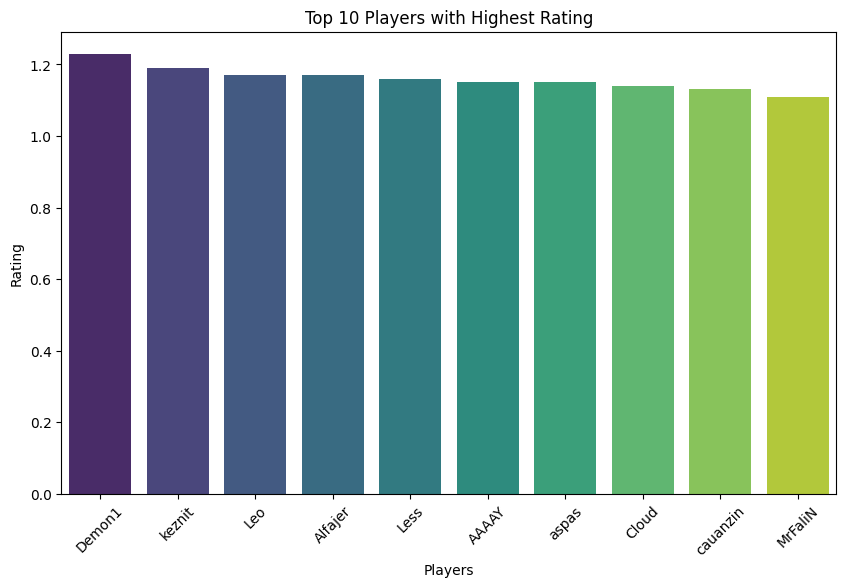

In [30]:
top_10_rating = df.nlargest(10, 'Rating')

plt.figure(figsize=(10, 6))
sns.barplot(y='Rating', x='Player', data=top_10_rating, palette='viridis')
plt.ylabel('Rating')
plt.xlabel('Players')
plt.title('Top 10 Players with Highest Rating')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


**Top 10 Players with Highest ACS**

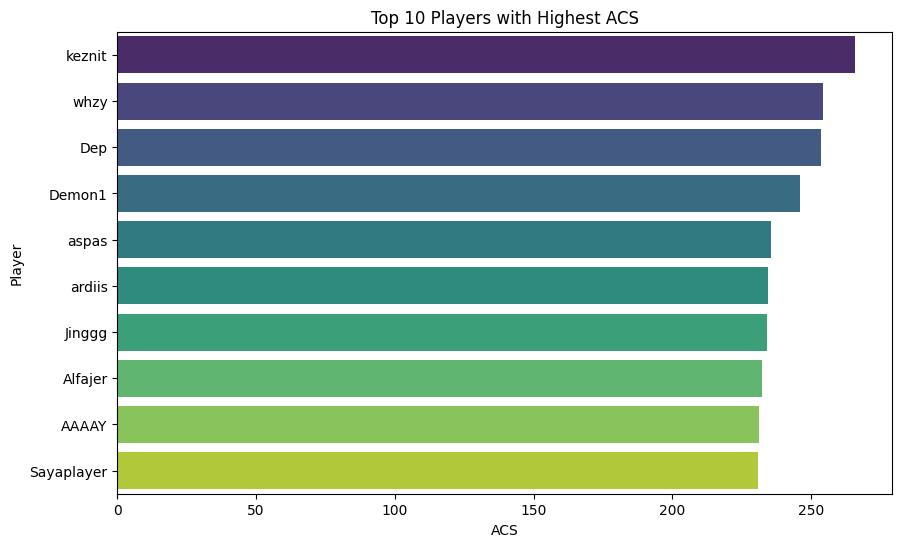

In [31]:
top_10_acs = df.nlargest(10, 'ACS')
plt.figure(figsize=(10, 6))
sns.barplot(x='ACS', y='Player', data=top_10_acs, palette='viridis')
plt.xlabel('ACS')
plt.ylabel('Player')
plt.title('Top 10 Players with Highest ACS')
plt.show()

**Team-wise Comparison of KD ratios**

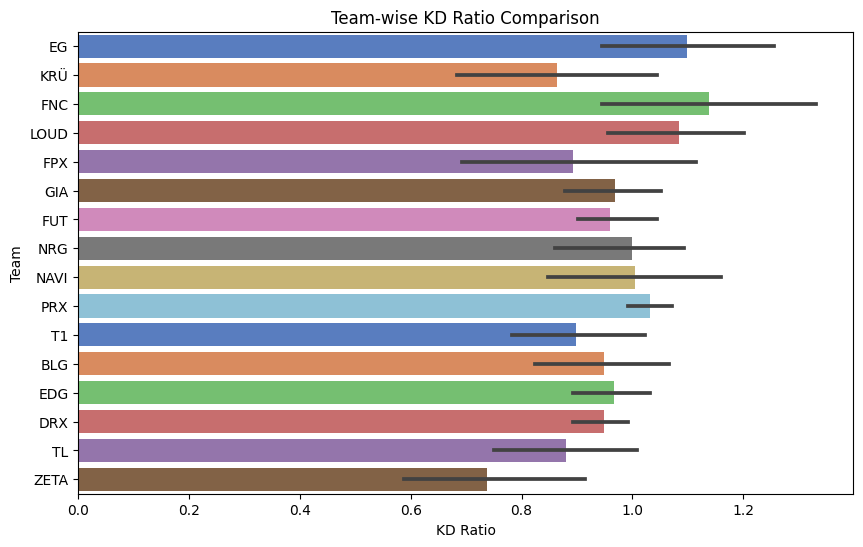

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(x='KD', y='Team', data=df, palette='muted')
plt.xlabel('KD Ratio')
plt.ylabel('Team')
plt.title('Team-wise KD Ratio Comparison')
plt.show()


# LINE PLOT

**Rounds Played per Player**

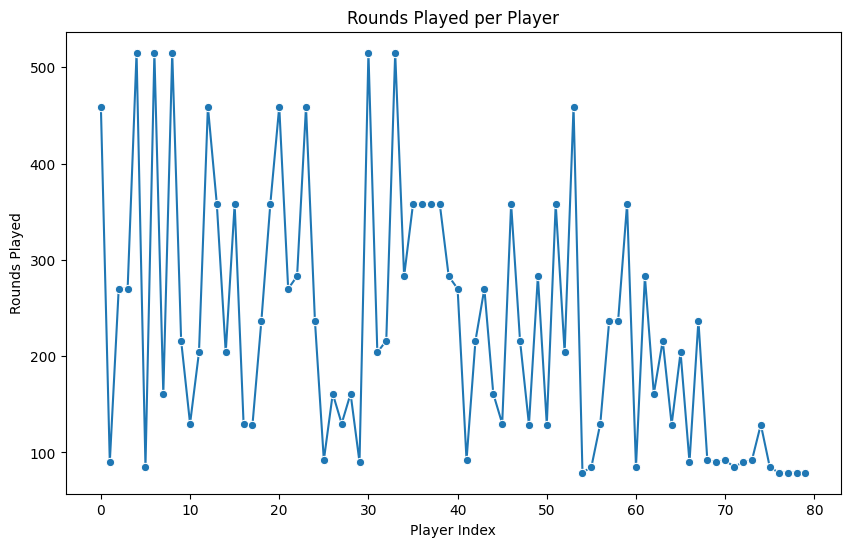

In [33]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=df.index, y='Rounds Played', data=df, marker='o')
plt.xlabel('Player Index')
plt.ylabel('Rounds Played')
plt.title('Rounds Played per Player')
plt.show()


**Kill Death Ratio of players**

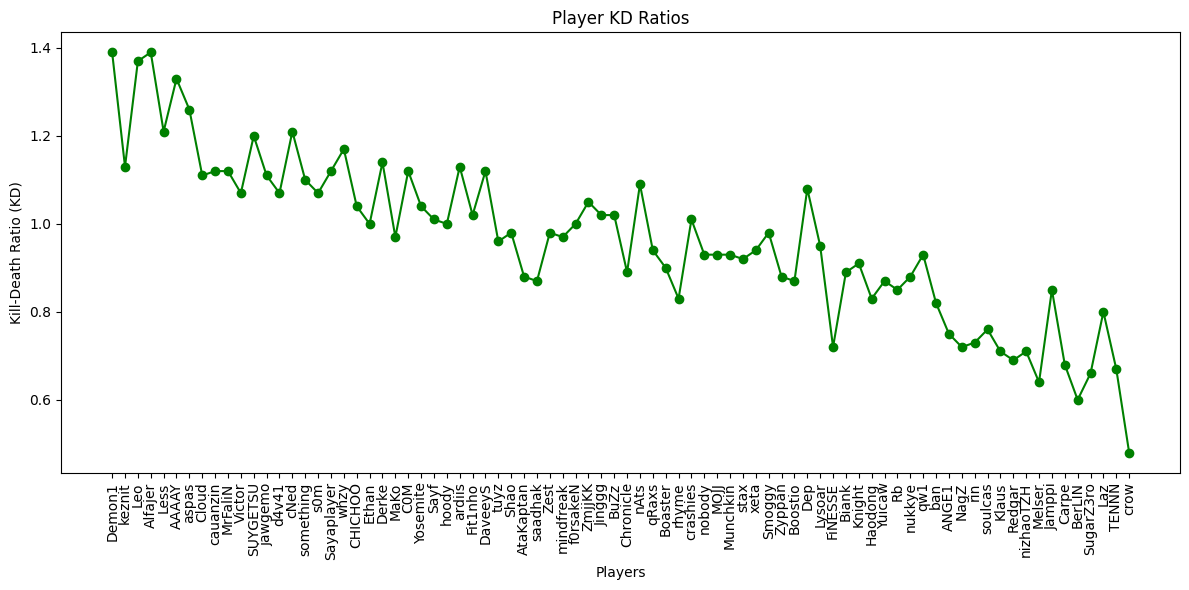

In [34]:
plt.figure(figsize=(12, 6))
players = df['Player']
kd_ratios = df['KD']

plt.plot(players, kd_ratios, marker='o', linestyle='-', color='green')
plt.xlabel('Players')
plt.ylabel('Kill-Death Ratio (KD)')
plt.title('Player KD Ratios')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()


# STACKED BARPLOT

**CSP per Player**

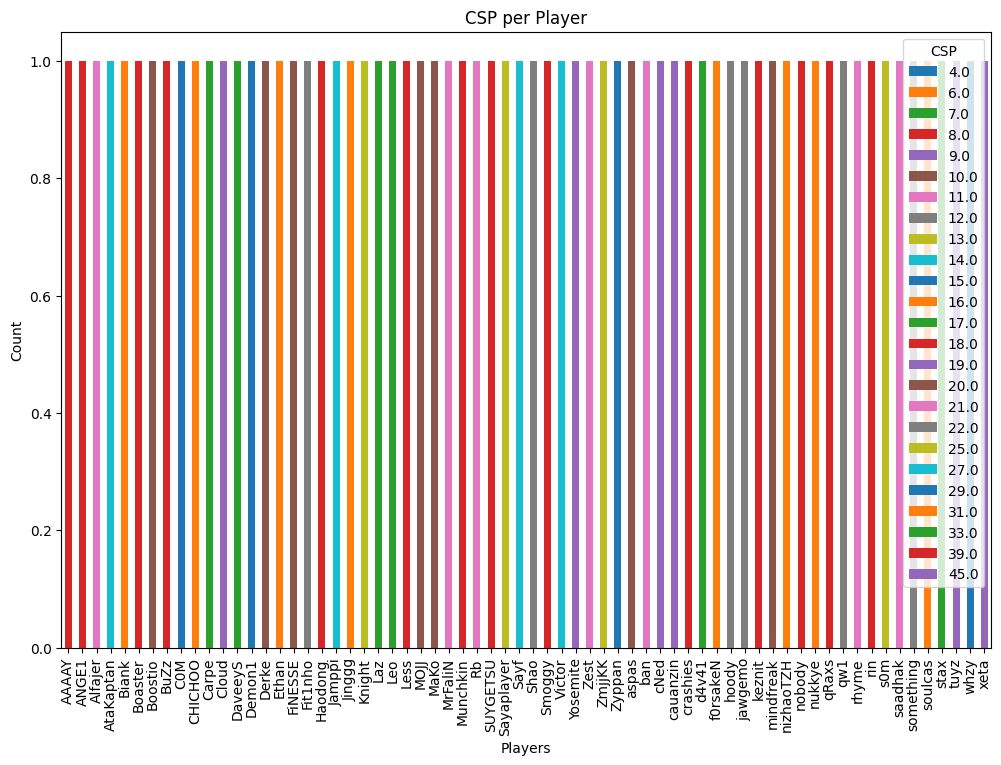

In [35]:
df['CSP'] = df['CSP'].str.replace('%', '', regex=False)  # Remove '%'
df['CSP'] = pd.to_numeric(df['CSP'], errors='coerce')    # Convert to numeric, coerce errors to NaN

# Plotting CSP per Player
pivot_csp = df.pivot_table(index='Player', columns='CSP', aggfunc='size', fill_value=0)
pivot_csp.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.xlabel('Players')
plt.ylabel('Count')
plt.title('CSP per Player')
plt.legend(title='CSP')
plt.show()

# PIE CHART

**Kill Distribution**

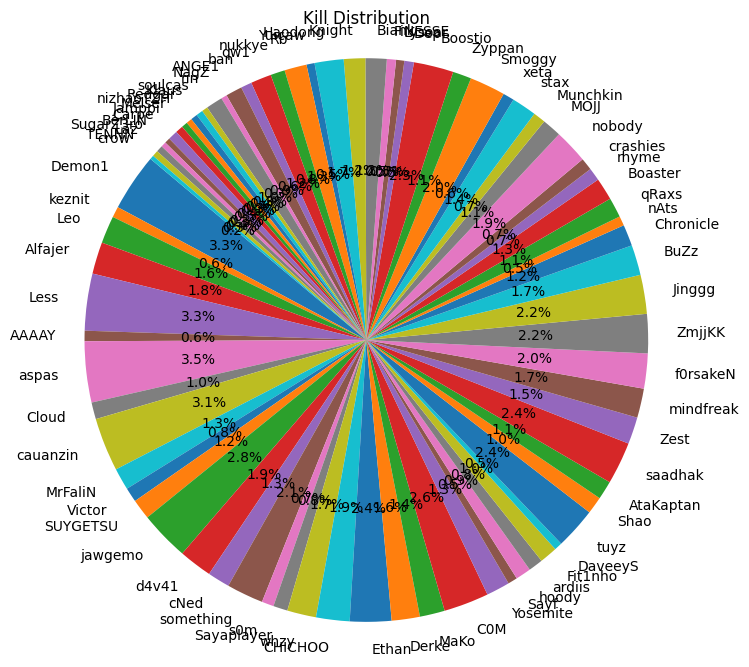

In [36]:
plt.figure(figsize=(8, 8))
kill_counts = df['K']
plt.pie(kill_counts, labels=df['Player'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Kill Distribution')
plt.show()

**Number of Agent Played**

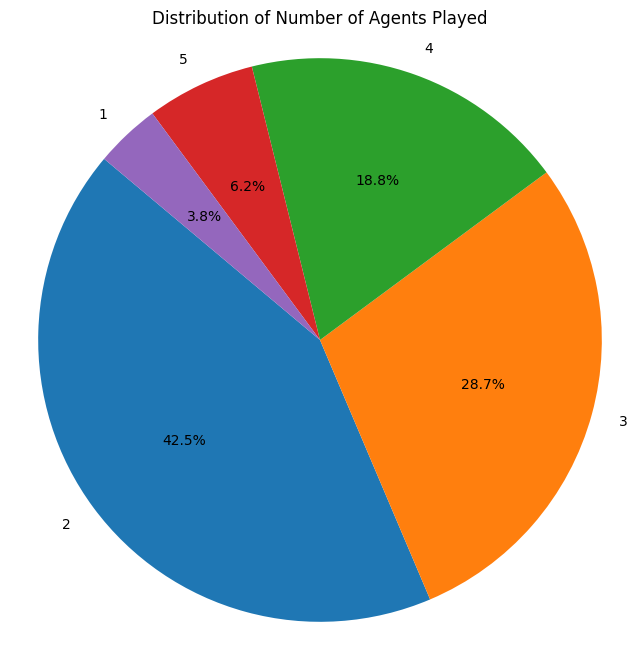

In [37]:
plt.figure(figsize=(8, 8))
agents_played = df['Number of Agents Played']
agent_counts = agents_played.value_counts()
plt.pie(agent_counts, labels=agent_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Number of Agents Played')
plt.show()


# Histogram

**Player Ratings**

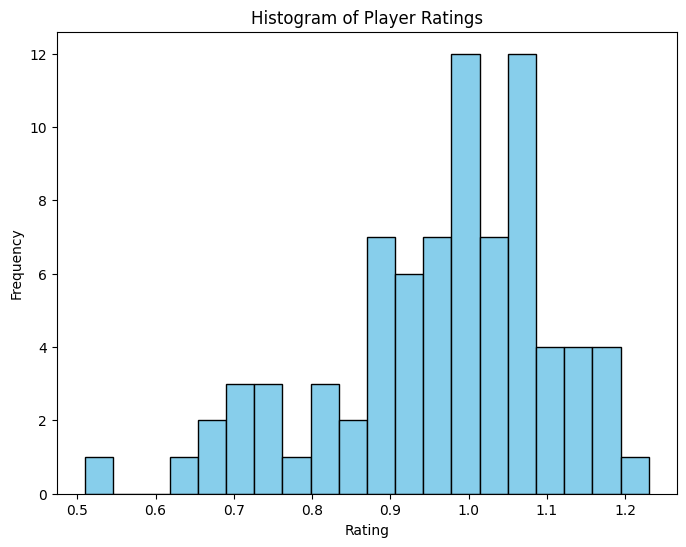

In [38]:
plt.figure(figsize=(8, 6))
plt.hist(df['Rating'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Player Ratings')
plt.show()

**HS Percentage**

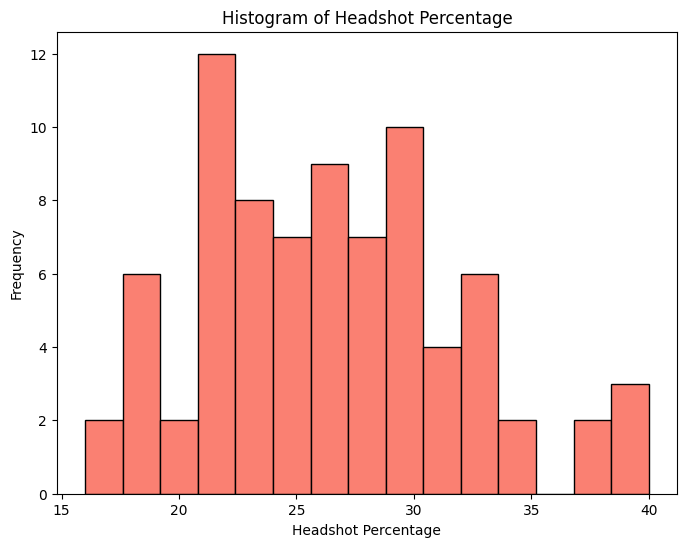

In [39]:
plt.figure(figsize=(8, 6))
hs_percentage = df['HSP'].str.rstrip('%').astype(float)
plt.hist(hs_percentage, bins=15, color='salmon', edgecolor='black')
plt.xlabel('Headshot Percentage')
plt.ylabel('Frequency')
plt.title('Histogram of Headshot Percentage')
plt.show()

# BOX PLOT

**Number of Agents Played**

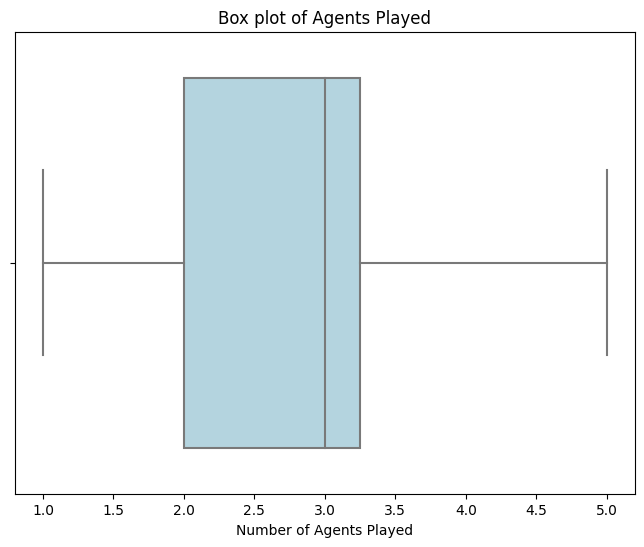

In [40]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Number of Agents Played', data=df, color='lightblue')
plt.xlabel('Number of Agents Played')
plt.title('Box plot of Agents Played')
plt.show()

# SCATTER PLOT

**ACS vs. ADR**

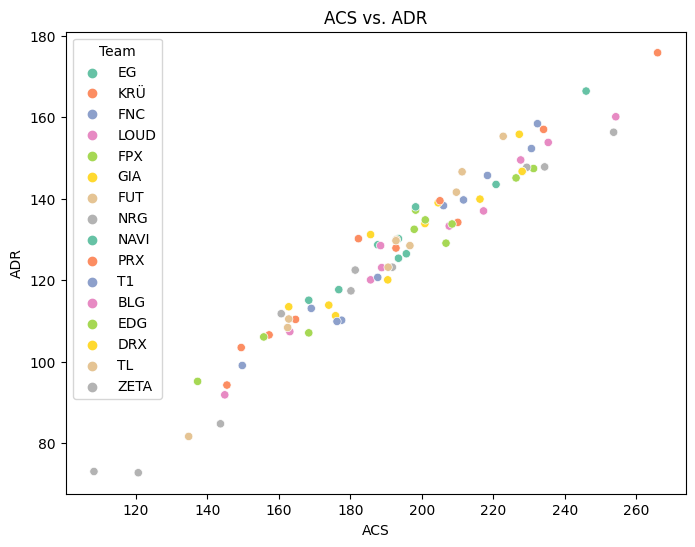

In [41]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ACS', y='ADR', data=df, hue='Team', palette='Set2')
plt.xlabel('ACS')
plt.ylabel('ADR')
plt.title('ACS vs. ADR')
plt.legend(title='Team')
plt.show()

# CORRELATION HEATMAP

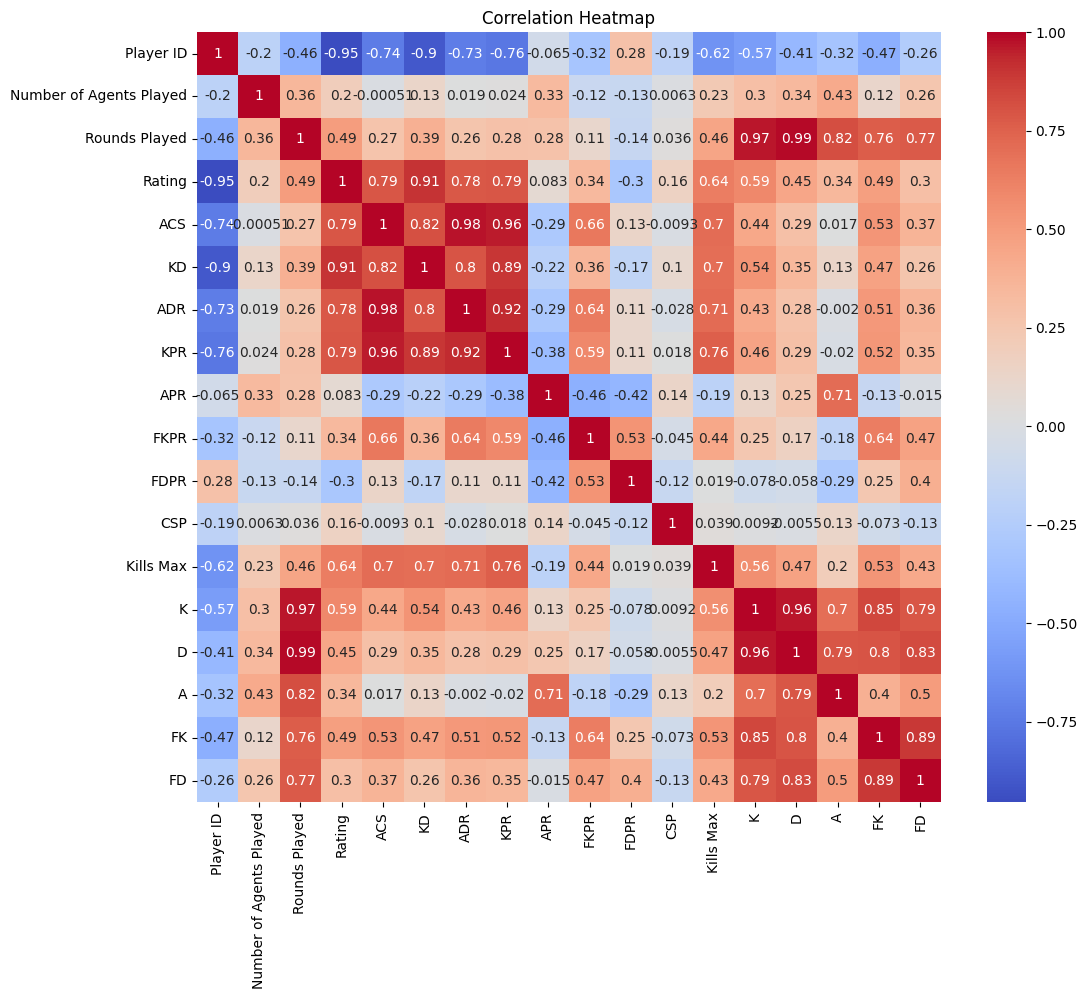

In [42]:
numeric_cols = df.select_dtypes(include='number')

plt.figure(figsize=(12, 10))
correlation_matrix = numeric_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()